# Preparing data for Modelling

In [1]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.base import clone

import seaborn as sns

import quantstats as qs
import os 
# pd.set_option('display.max_rows', None)
import os 

# To automatically load changes in different files 
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
import matplotlib.pyplot as plt 
# Applying Settings to Viaualization Tools 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
# Set color palette to blue shades
sns.set_palette(["#003366", "#6699CC", "#99CCFF", "#99CCFF"])
sns.set_palette(["#002855", "#3E7EAA", "#82B5D8", "#B3D9F2"])
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style("darkgrid")

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, mean_absolute_percentage_error
import statsmodels.api as sm

In [2]:
track_results = {}
counter = 0

In [3]:
from utils import search_folder
current_dir = os.getcwd()
thesis_folder_path = current_dir.replace("thesis_code", "")
twitter_data_path = search_folder(thesis_folder_path,"twitter_data")
eikon_data_path = search_folder(thesis_folder_path,"eikon_news")
stock_data_path = search_folder(thesis_folder_path,"stock_prices")
modelling_data_path = search_folder(thesis_folder_path,"modelling_data")
google_trending_path = search_folder(thesis_folder_path,"google_search")

In [4]:
def read_modelling(path, name):
    df = pd.read_csv(path+name)
    df["datetime"] = pd.to_datetime(df["datetime"])
    df = df.sort_values(by = "datetime", ascending = True)
    df = df.reset_index(drop = True)
    return df

---
## Stock Data 

In [5]:
stock_data_df = read_modelling(modelling_data_path, "/all_stocks_returns_df.csv")
stock_data_df.head(3)

,datetime,close,net,ret,open,low,high,volume,turnover_usd,flow,company
0,2017-01-03,14.465986,NaN,NaN,14.323986,14.063986,14.688652,8.884890e+07,1.283684e+09,0.000000e+00,tesla
1,2017-01-03,29.037500,NaN,NaN,28.950000,28.690000,29.082500,1.151275e+08,3.327549e+09,0.000000e+00,apple
2,2017-01-04,29.005000,-0.0325,-0.001119,28.962500,28.937500,29.127500,8.447246e+07,2.452484e+09,-2.452484e+09,apple


---
## Fama French Model Features 

In [6]:
fama_french_feat_df = read_modelling(modelling_data_path, "/fama_variables_companies.csv")
fama_french_feat_df.head(3)

,datetime,beta_mktrf,beta_smb,beta_hml,beta_rmw,beta_cma,idvar_ff5,company
0,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,moderna
1,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,tesla
2,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,apple


In [7]:
# # joining stock data with fama french factors
# master_table = pd.merge(stock_data_df, fama_french_feat_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
# master_table = master_table.drop_duplicates()

---
## Twitter Sentiment Model Features 

In [8]:
sentiment_df = pd.read_csv(modelling_data_path + "/master_table_news_sentiment.csv")
sentiment_df["datetime"] = pd.to_datetime(sentiment_df["date"], utc = True)
sentiment_df = sentiment_df.sort_values(by = "datetime")
sentiment_df

,date,company,daytweets,textblob_tw_sw,vader_tw_sw,finbert_tw_sw,textblob_senti_sw,vader_sw,finbert_senti_sw,textblob_senti_tw,...,Vader_sentim,Finbert_sentim,news_count,eik_textblob_senti_sw,eik_finbert_senti_sw,eik_vader_senti_sw,eik_Finbert_sentim,eik_Textblob_senti,eik_Vader_sentim,datetime
0,2017-01-02,apple,195364,108.654740,145.5335,-35.0,50.796503,476,-22.0,57.858238,...,47.3583,-1.0,16.0,0.107143,-6.0,-0.2248,-3.0,0.107143,-0.2248,2017-01-02 00:00:00+00:00
1,2017-01-02,google,32400,27.841547,4.7608,-50.0,11.939170,203,-23.0,15.902377,...,1.0690,-20.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0000,2017-01-02 00:00:00+00:00
2,2017-01-02,tesla,27556,69.120491,56.5365,15.0,25.982624,181,0.0,43.137866,...,17.7594,2.0,1.0,0.000000,-1.0,0.0000,-1.0,0.000000,0.0000,2017-01-02 00:00:00+00:00
3,2017-01-03,apple,187489,100.070978,73.2125,-24.0,49.393965,462,-12.0,50.677013,...,39.5845,4.0,4.0,0.000000,0.0,0.0000,0.0,0.000000,0.0000,2017-01-03 00:00:00+00:00
4,2017-01-03,google,15876,19.047536,36.4611,-18.0,9.819791,135,-9.0,9.227745,...,14.5385,-3.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0000,2017-01-03 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,2023-04-13,moderna,25,4.696667,2.5965,5.0,2.348333,5,3.0,2.348333,...,1.0123,2.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0000,2023-04-13 00:00:00+00:00
6213,2023-04-14,google,961,6.778229,8.8280,-10.0,2.089114,34,-4.0,4.689114,...,1.4330,-2.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0000,2023-04-14 00:00:00+00:00
6214,2023-04-14,moderna,289,3.375763,4.5592,16.0,1.622256,18,8.0,1.753506,...,1.0322,6.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0000,2023-04-14 00:00:00+00:00
6212,2023-04-14,apple,13924,42.478908,52.1386,8.0,23.767439,126,1.0,18.711469,...,22.6046,2.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0000,2023-04-14 00:00:00+00:00


---
## Eikon Sentiment  Features 

---
## Topic Modelling Features

---
## Google Trending News for Companies

In [9]:
comp_google_search_df = read_modelling(modelling_data_path, "/google_searches_companies.csv")
comp_google_search_df.head()

,datetime,interest,company
0,2018-04-08,31,apple
1,2018-04-15,1,moderna
2,2018-04-15,33,apple
3,2018-04-15,18,tesla
4,2018-04-22,31,apple


In [10]:
from utils import fix_dates
comp_google_search_df["datetime"] = comp_google_search_df["datetime"].apply(lambda x: fix_dates(x))
comp_google_search_df.head()

,datetime,interest,company
0,2018-04-09,31,apple
1,2018-04-16,1,moderna
2,2018-04-16,33,apple
3,2018-04-16,18,tesla
4,2018-04-23,31,apple


---
## Google Trending News for Macro-News

In [11]:
makro_google_search_df = read_modelling(modelling_data_path, "/google_macro_searches.csv")
makro_google_search_df.head(3)

,datetime,pandemic_mentions,inflation_mentions
0,2018-04-08,1,17
1,2018-04-15,1,16
2,2018-04-22,1,17


In [12]:
makro_google_search_df["datetime"] = makro_google_search_df["datetime"].apply(lambda x: fix_dates(x))
makro_google_search_df.head(3)

,datetime,pandemic_mentions,inflation_mentions
0,2018-04-09,1,17
1,2018-04-16,1,16
2,2018-04-23,1,17


---
## Macro-Economic Data

In [13]:
macro_data_df = read_modelling(modelling_data_path, "/macro_data.csv")
macro_data_df.head(3)

,datetime,euro_doll_bid,euro_doll_ask,eur_doll_high,eur_doll_low,eur_doll_open,refresh_rate,euro_doll_bidnet,nasdaq_close,nasdaqd_net,nasdaqd_ret,nasdaq_open,nasdaq_low,nasdaq_high,nasdaq_volume
0,2017-01-03,1.0404,1.0408,1.0490,1.0339,1.0453,74707.0,-0.0053,4911.334,NaN,NaN,4900.854,4884.522,4928.490,152438794
1,2017-01-04,1.0486,1.0490,1.0499,1.0387,1.0403,91660.0,0.0082,4937.205,25.871,0.005268,4920.792,4919.803,4944.745,141126335
2,2017-01-05,1.0603,1.0611,1.0615,1.0478,1.0489,103626.0,0.0117,4964.953,27.748,0.005620,4936.355,4935.343,4967.901,140485654


---
## Features Table

In [14]:
# joining stock data with fama french factors
master_table = pd.merge(stock_data_df, fama_french_feat_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_table = master_table.drop_duplicates()

#  joining master table with macro data from Eikon 
master_table = pd.merge(master_table, macro_data_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_table = master_table.drop_duplicates()

# Joining master table with makro data from google search 
master_table = pd.merge(master_table, makro_google_search_df, how = "left", left_on=["datetime"], right_on = ["datetime"])
master_table = master_table.drop_duplicates()

# Joining master table with makro data from google search 
master_table = pd.merge(master_table, comp_google_search_df, how = "left", left_on=["datetime", "company"], right_on = ["datetime", "company"])
master_table = master_table.drop_duplicates()

--- 
### 7 - Additional Features: (Technical Analysis, Sentiment, Price patterns, etc.)

In [15]:
def prepare_df(df, col_to_pred : str, Ssenti_vars: list, lag):
    
    # Computing 1 day forward target prediction  
    target_var = "ft_target"
    df["ft_target"] = df[col_to_pred].shift(-lag)
    
    for lag in range(0,11): 
        df["lag_"+ str(lag)] = df[col_to_pred].shift(lag)
         
    df['mean2w'] = df["lag_0"].rolling(window=10).mean()
    df['std2w'] = df["lag_0"].rolling(window=10).std()
    df['std1w'] = df["lag_0"].rolling(window=5).std()
    
    for senti_var in Ssenti_vars: 
        for lag in range(1, 400, 2): 
            df["rolled_"+ senti_var + "_" +str(lag)] = df[senti_var].rolling(window = lag, min_periods=0).sum()
    
    df = df.drop(columns = [col_to_pred])
    
    df.fillna(0.0)

    return df

---
### Selecting Company and Adding Sentiment Variables

In [116]:
company = "moderna"
comp_pred_df = master_table[master_table["company"] == company]
comp_pred_df.loc[:, "interest"] = comp_pred_df["interest"].ffill().fillna(0.0) # modify the original DataFrame using .loc
comp_pred_df.loc[:, "rolling_interest"] = comp_pred_df["interest"].rolling(3).mean().ffill().fillna(0.0)
comp_pred_df.loc[:, "pandemic_mentions"] = comp_pred_df["pandemic_mentions"].ffill().fillna(0.0)
comp_pred_df.loc[:, "inflation_mentions"] = comp_pred_df["inflation_mentions"].ffill().fillna(0.0)

# Selecting company
single_sentiment_df = sentiment_df[sentiment_df["company"] == company]
single_sentiment_df = single_sentiment_df.sort_values(by = "datetime")

comp_pred_df["datetime"] = pd.to_datetime(comp_pred_df["datetime"], utc = True)

# Merging Sentimnent with company data 
comp_pred_df_senti = pd.merge(comp_pred_df, single_sentiment_df, how = "left", on = ["datetime"])

senti_vars = list(sentiment_df.columns[3:-1])
senti_vars.remove("news_count")

# Compute technical labels and fill NaN values with 0.0
comp_pred_final_df = prepare_df(comp_pred_df_senti, "ret", senti_vars, 1)
comp_pred_final_df = comp_pred_final_df.fillna(0.0)

# Define lists of column names
macro_vars = [ 'open', 'low', 'high', 'volume', 'euro_doll_bid', 'euro_doll_ask', 'eur_doll_high', 'eur_doll_low', 'eur_doll_open', 'refresh_rate', 
              'euro_doll_bidnet', 'nasdaq_close', 'nasdaqd_net', 'nasdaqd_ret', 'nasdaq_open', 'nasdaq_low', 'nasdaq_high', 'nasdaq_volume'
              ]

google_vars = ["pandemic_mentions", "inflation_mentions", 'interest', 'rolling_interest']

lagged_vars = ['lag_0', 'lag_1', 'lag_2', 'lag_3', 'lag_4',    'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', "lag_10"]

techni_vars = ['mean2w', 'std2w', 'std1w']

fama_vars = ['beta_mktrf', 'beta_smb', 'beta_hml', 'beta_rmw', 'beta_cma']

Csenti_vars = list(comp_pred_final_df.columns[74:])
Csenti_vars += ["daytweets", "news_count"]
date = ["datetime"]
ft_target = ["ft_target"]

In [117]:
corr_df = comp_pred_df_senti[Csenti_vars + ft_target].corr().abs()
corr_df = corr_df[["ft_target"]].sort_values(by = "ft_target",ascending = False)

In [118]:
corr_df = corr_df.reset_index()
corr_df["index"] = corr_df["index"].apply(lambda x: str(x))

In [119]:
corr_df["index"] = corr_df["index"].apply(lambda x: str(x))

In [120]:
eikon_df = corr_df[corr_df["index"].str.contains("_eik_")]

In [121]:
eikon_df.head(10)

,index,ft_target
13,rolled_eik_Textblob_senti_389,0.053088
14,rolled_eik_Textblob_senti_385,0.053007
15,rolled_eik_Textblob_senti_387,0.052993
16,rolled_eik_Textblob_senti_391,0.052962
17,rolled_eik_Textblob_senti_383,0.052954
18,rolled_eik_Textblob_senti_371,0.052850
19,rolled_eik_Textblob_senti_355,0.052823
20,rolled_eik_Textblob_senti_373,0.052815
21,rolled_eik_Textblob_senti_393,0.052805
22,rolled_eik_Textblob_senti_361,0.052771


In [122]:
tweets_corr_df = corr_df[~corr_df["index"].str.contains("_eik_")]

In [123]:
tweets_corr_df.head(10)

,index,ft_target
0,ft_target,1.000000
1,news_count,0.072320
2,daytweets,0.071160
3,rolled_vader_senti_tw_1,0.064688
4,rolled_vader_z_sc_1,0.064488
5,rolled_vader_tw_sw_1,0.064399
6,rolled_textblob_tw_sw_1,0.059470
7,rolled_textblob_senti_tw_1,0.059070
8,rolled_Vader_sentim_1,0.058890
9,rolled_textblob_z_sc_1,0.058833


In [124]:
tweets_corr_df.tail(10)

,index,ft_target
4187,rolled_finbert_senti_sw_7,0.000112
4188,rolled_Vader_sentim_215,0.000100
4189,rolled_Finbert_sentim_267,0.000099
4190,rolled_finbert_senti_tw_257,0.000096
4192,rolled_vader_z_sc_211,0.000068
4195,rolled_vader_senti_tw_93,0.000056
4197,rolled_vader_tw_sw_95,0.000043
4200,rolled_Finbert_sentim_263,0.000030
4201,rolled_finbert_senti_sw_279,0.000022
4202,rolled_finbert_tw_sw_271,0.000003


In [47]:
from utils import plot_three_line_chart

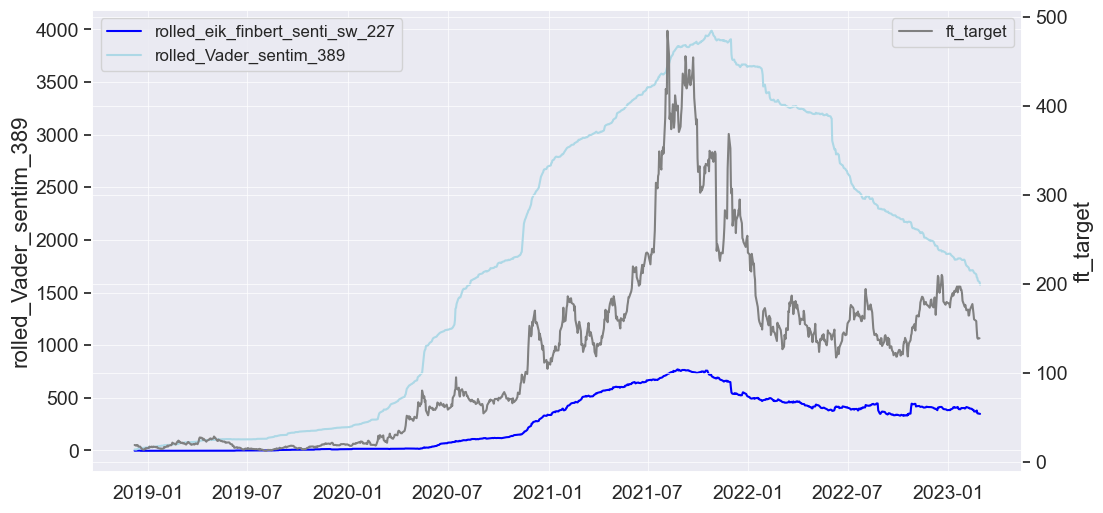

In [96]:
plot_three_line_chart(comp_pred_df_senti, "datetime", "rolled_eik_finbert_senti_sw_227", "ft_target","rolled_Vader_sentim_389")

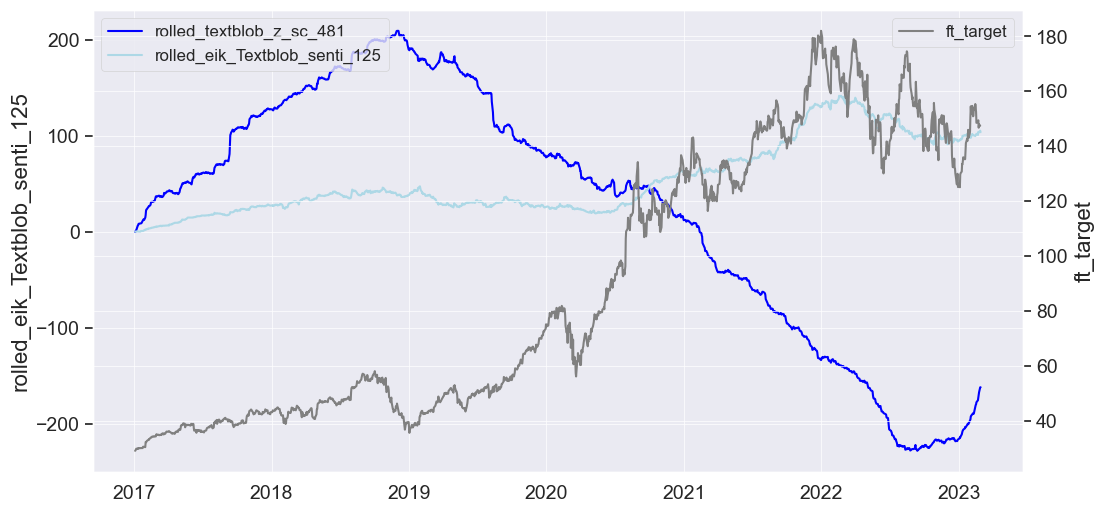

In [145]:
plot_three_line_chart(comp_pred_df_senti, "datetime", "rolled_textblob_z_sc_481", "ft_target","rolled_textblob_z_sc_481")

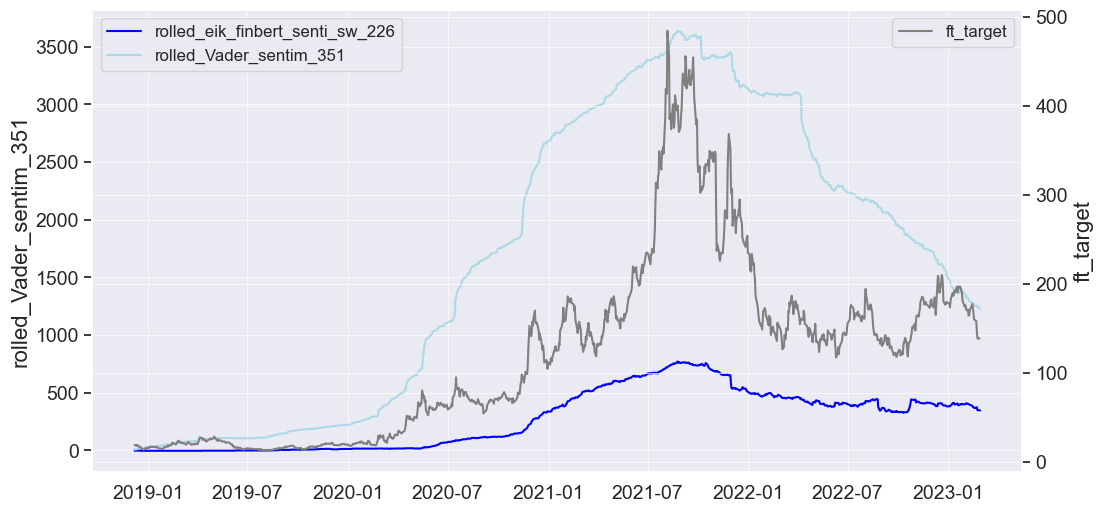

In [52]:
from utils import plot_three_line_chart
plot_three_line_chart(comp_pred_df_senti, "datetime", "rolled_eik_finbert_senti_sw_226", "ft_target","rolled_Vader_sentim_351")

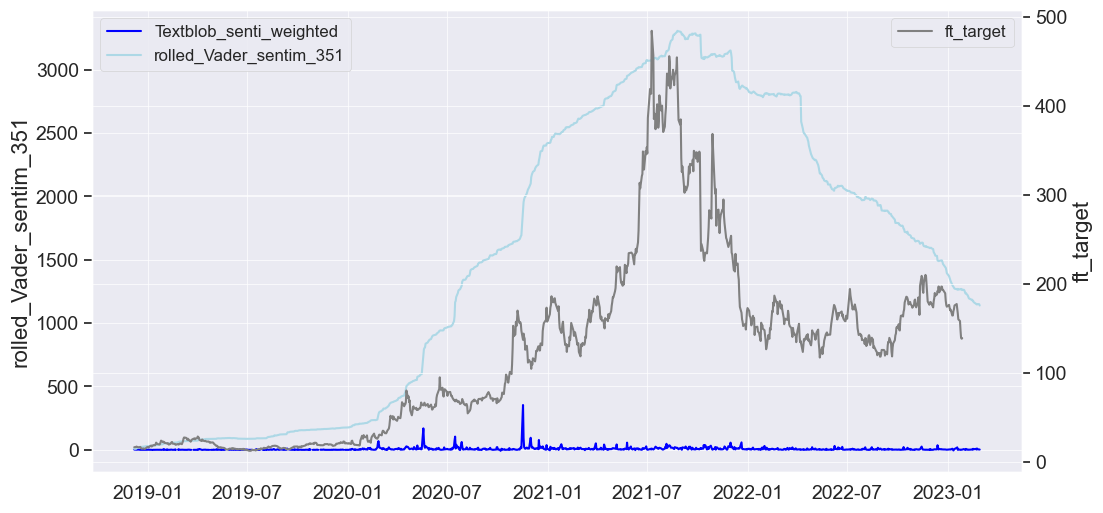

In [654]:
from utils import plot_three_line_chart
plot_three_line_chart(comp_pred_df_senti, "datetime", "Textblob_senti_weighted", "ft_target","rolled_Vader_sentim_351")

In [131]:
Ssenti_vars = ["rolled_Vader_sentim_351","rolled_Finbert_sentim_weighted_21"]# -> moderna
#Ssenti_vars = ["rolled_Vader_sentim_351","rolled_eik_finbert_senti_sw_226","rolled_eik_vader_senti_sw_21"]# -> best results so far moderna
Ssenti_vars = ["rolled_eik_Textblob_senti_119", "rolled_eik_Textblob_senti_125"] # - > apple
SSenti_vars = ["rolled_eik_Vader_sentim_235", "rolled_finbert_senti_tw_215"] #ä - > tesla
# new 
SSenti_vars = ["rolled_vader_senti_tw_1", "rolled_eik_Textblob_senti_389"]

#Ssenti_vars = []

In [132]:
all_feat = date + macro_vars + google_vars + lagged_vars + techni_vars + fama_vars + ft_target + Ssenti_vars
modelling_ft = macro_vars + google_vars + lagged_vars + techni_vars + fama_vars + Ssenti_vars
comp_pred_final = comp_pred_final_df[all_feat]
comp_pred_final = comp_pred_final.iloc[:-1,:]

In [133]:
comp_pred_final = comp_pred_final[comp_pred_final["datetime"] <= "2023-02-15 00:00:00+00:00"]

In [134]:
#xgboost_test = {'xgboost': {'alpha_estimation_method':'Lasso', "alpha": 0.0}}
xgboost_test = {'xgboost': {'alpha_estimation_method':'xgboost'}}

In [135]:
all_results_df = pd.read_csv(modelling_data_path + "/results_summary.csv", index_col =[0])
all_results_df = all_results_df.drop_duplicates()
change = "returns - all variables - moderna - with sentiment - xgboost"
counter = len(all_results_df)
from class_backtester import Backtester as bk 
backtester = bk(df = comp_pred_final, 
                params = None,
                modeling_features = modelling_ft,
                rolling_frw = '1D',
                look_back_prm = 252, 
                configurations= xgboost_test, 
                col_to_pred = 'ft_target',
                days_avoid_bias = 0)

backtester.run_backtest()
track_results = {}
resutls_df = backtester.dict_all_predictions["xgboost"][["datetime", "ft_target","ft_target_pred"]]
resutls_df['y_test'] = (resutls_df['ft_target'] > resutls_df['ft_target'].shift()).astype(int)
resutls_df['y_test'] = resutls_df['y_test'].fillna(0)
resutls_df['y_pred'] = (resutls_df['ft_target_pred'] > resutls_df['ft_target_pred'].shift()).astype(int)
resutls_df['y_pred'] = resutls_df['y_pred'].fillna(0)
resutls_df = resutls_df.set_index("datetime")
track_results["trial_"+str(counter)] = {}
track_results["trial_"+str(counter)]["changes"] = change
track_results["trial_"+str(counter)]["precision"] = precision_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["recall"] = recall_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["accuracy"] = accuracy_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["f1_score"] = f1_score(resutls_df["y_test"], resutls_df["y_pred"])
track_results["trial_"+str(counter)]["mae"] = round(mean_absolute_percentage_error(resutls_df.iloc[:,:2]["ft_target"], resutls_df.iloc[:,:2]["ft_target_pred"]),5)*100
track_results["trial_"+str(counter)]["datetime"] = list(resutls_df["ft_target"].index)
track_results["trial_"+str(counter)]["y_test"] = list(resutls_df["ft_target"].values)
track_results["trial_"+str(counter)]["y_pred"] = list(resutls_df["ft_target_pred"].values)
results_df = pd.DataFrame.from_dict(track_results, orient='index')
all_results_df = pd.concat([all_results_df, results_df])
all_results_df.to_csv(modelling_data_path + "/results_summary.csv")

100%|██████████| 1278/1278 [00:56<00:00, 22.78it/s]


In [136]:
all_results_df = pd.read_csv(modelling_data_path + "/results_summary.csv", index_col =[0])
all_results_df

,changes,precision,recall,accuracy,f1_score,mae,datetime,y_test,y_pred
trial_1,close - all variables - moderna - new sentimen...,0.494530,0.511312,0.492045,0.502781,4.809,NaN,NaN,NaN
trial_2,close - all variables - moderna - no sentiment...,0.498896,0.512472,0.497156,0.505593,4.838,NaN,NaN,NaN
trial_3,close - all variables - moderna - new sentimen...,0.500000,0.527149,0.497727,0.513216,4.801,NaN,NaN,NaN
trial_4,close - all variables - apple - no sentiment -...,0.500000,0.527149,0.497727,0.513216,4.801,"[Timestamp('2019-08-16 00:00:00+0000', tz='UTC...","[13.4, 14.15, 14.29, 14.16, 13.88, 14.97, 14.5...","[12.910895, 13.068525, 13.749891, 13.827463, 1..."
trial_4,close - all variables - apple - with sentiment...,0.506106,0.516620,0.477656,0.511309,1.971,"[Timestamp('2017-09-12 00:00:00+0000', tz='UTC...","[39.9125, 39.57, 39.97, 39.6675, 39.6825, 39.0...","[40.017666, 40.198383, 39.96111, 39.40044, 39...."
trial_5,close - all variables - apple - no sentiment -...,0.530696,0.538781,0.504029,0.534708,1.957,"[Timestamp('2017-09-12 00:00:00+0000', tz='UTC...","[39.9125, 39.57, 39.97, 39.6675, 39.6825, 39.0...","[40.2497, 40.132454, 39.89137, 39.47665, 39.81..."
trial_6,close - all variables - apple - with new senti...,0.525745,0.537396,0.498901,0.531507,1.956,"[Timestamp('2017-09-12 00:00:00+0000', tz='UTC...","[39.9125, 39.57, 39.97, 39.6675, 39.6825, 39.0...","[40.293518, 39.99959, 39.55685, 39.48669, 39.8..."
trial_7,close - all variables - tesla - no new sentime...,0.526316,0.535211,0.507692,0.530726,3.750,"[Timestamp('2017-09-12 00:00:00+0000', tz='UTC...","[24.415309, 25.175975, 25.320641, 25.666641, 2...","[24.063812, 24.06775, 24.631632, 25.039356, 25..."
trial_8,close - all variables - tesla - with new senti...,0.518569,0.530986,0.499634,0.524704,3.772,"[Timestamp('2017-09-12 00:00:00+0000', tz='UTC...","[24.415309, 25.175975, 25.320641, 25.666641, 2...","[23.87555, 24.178665, 24.810255, 25.40084, 25...."
trial_9,close - all variables - tesla - with newest se...,0.518569,0.530986,0.499634,0.524704,3.772,"[Timestamp('2017-09-12 00:00:00+0000', tz='UTC...","[24.415309, 25.175975, 25.320641, 25.666641, 2...","[23.87555, 24.178665, 24.810255, 25.40084, 25...."


---
### Statistically Significant Variables 

In [103]:
import statsmodels.api as sm

In [104]:
X = comp_pred_final[modelling_ft]
y = comp_pred_final["ft_target"]

In [105]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ft_target   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3918.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        20:07:13   Log-Likelihood:                -3680.8
No. Observations:                1055   AIC:                             7450.
Df Residuals:                    1011   BIC:                             7668.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [647]:
no_sentiment = resutls_df.copy()

In [673]:
no_sentiment["noSenti_resi"] = abs(no_sentiment["ft_target"] - no_sentiment["ft_target_pred"])
no_sentiment["noSenti_resi"] = no_sentiment["noSenti_resi"].rolling(31).mean()
resutls_df["Senti_resi"] = abs(resutls_df["ft_target"] - resutls_df["ft_target_pred"])
resutls_df["Senti_resi"] = resutls_df["Senti_resi"].rolling(31).mean()

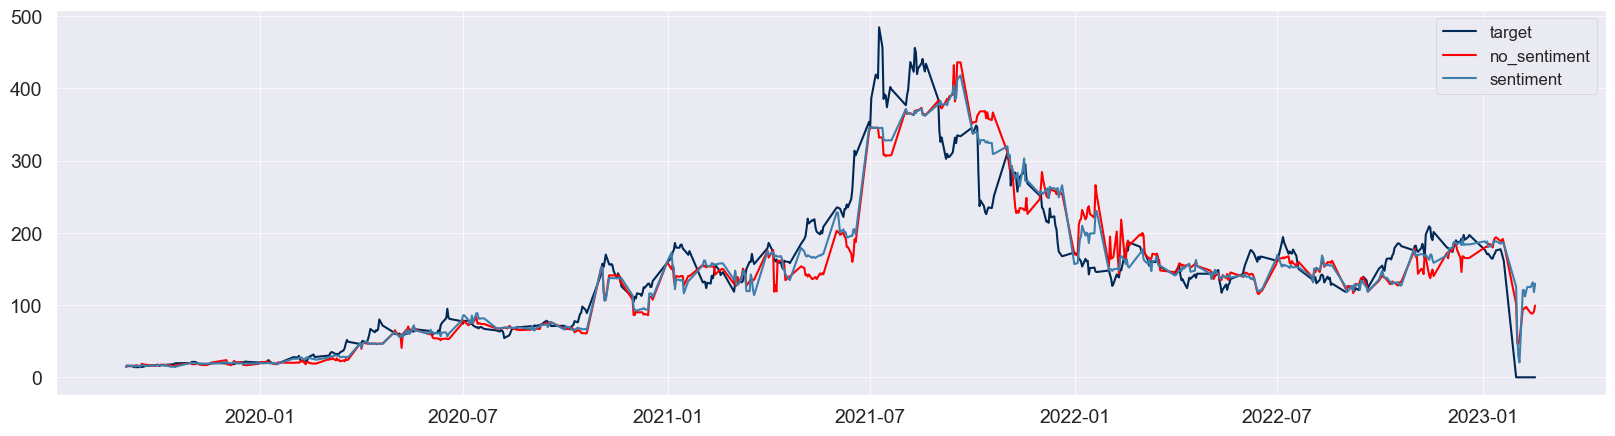

In [678]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.ft_target)
plt.plot(no_sentiment.index, no_sentiment.ft_target_pred, color = "red")
plt.plot(resutls_df.index, resutls_df.ft_target_pred)
plt.legend(["target", "no_sentiment", "sentiment"])
plt.show()

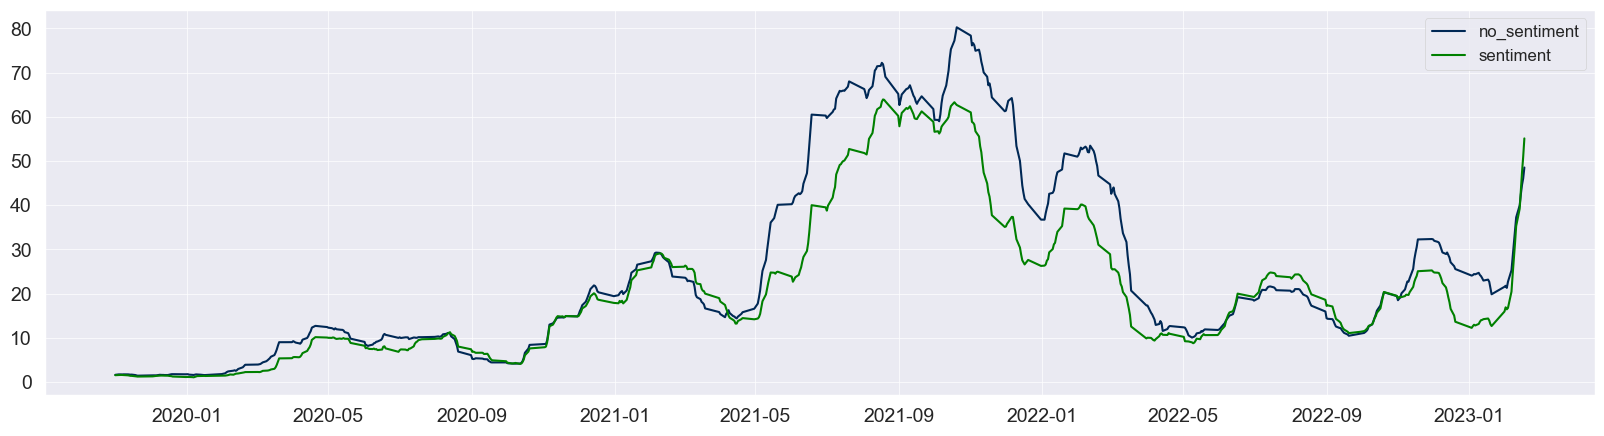

In [674]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.noSenti_resi)
plt.plot(resutls_df.index, resutls_df.Senti_resi, color = "green")
plt.legend(["no_sentiment", "sentiment"])
plt.show()

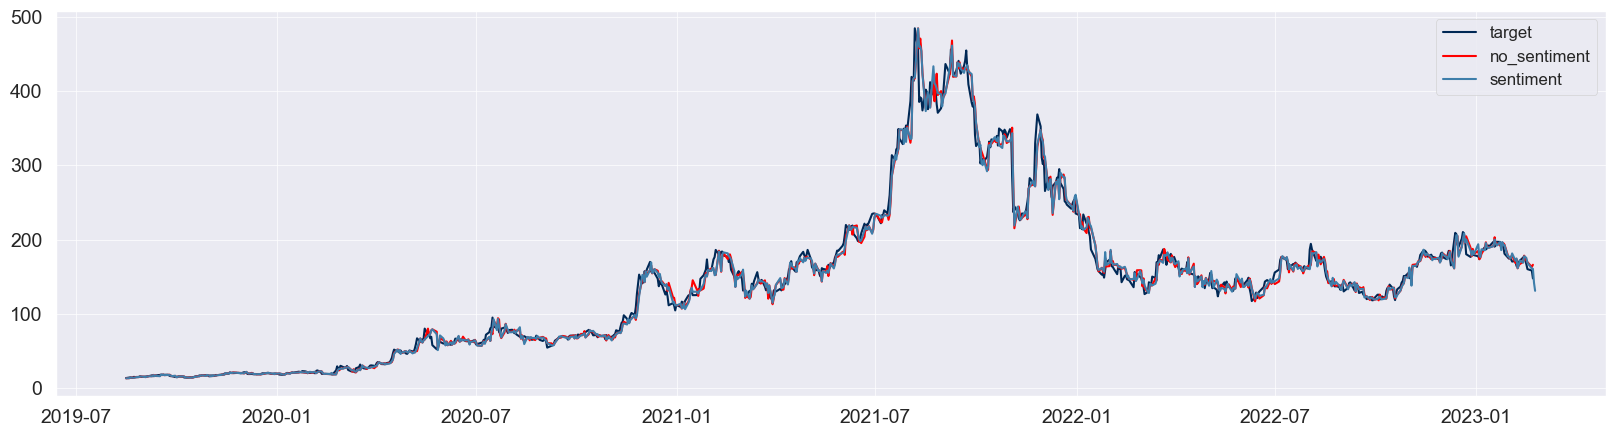

In [579]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.ft_target)
plt.plot(no_sentiment.index, no_sentiment.ft_target_pred, color = "red")
plt.plot(resutls_df.index, resutls_df.ft_target_pred)
plt.legend(["target", "no_sentiment", "sentiment"])
plt.show()

In [632]:
no_sentiment["noSenti_resi"] = abs(no_sentiment["ft_target"] - no_sentiment["ft_target_pred"])
no_sentiment["noSenti_resi"] = no_sentiment["noSenti_resi"].rolling(365).mean()
resutls_df["Senti_resi"] = abs(resutls_df["ft_target"] - resutls_df["ft_target_pred"])
resutls_df["Senti_resi"] = resutls_df["Senti_resi"].rolling(365).mean()

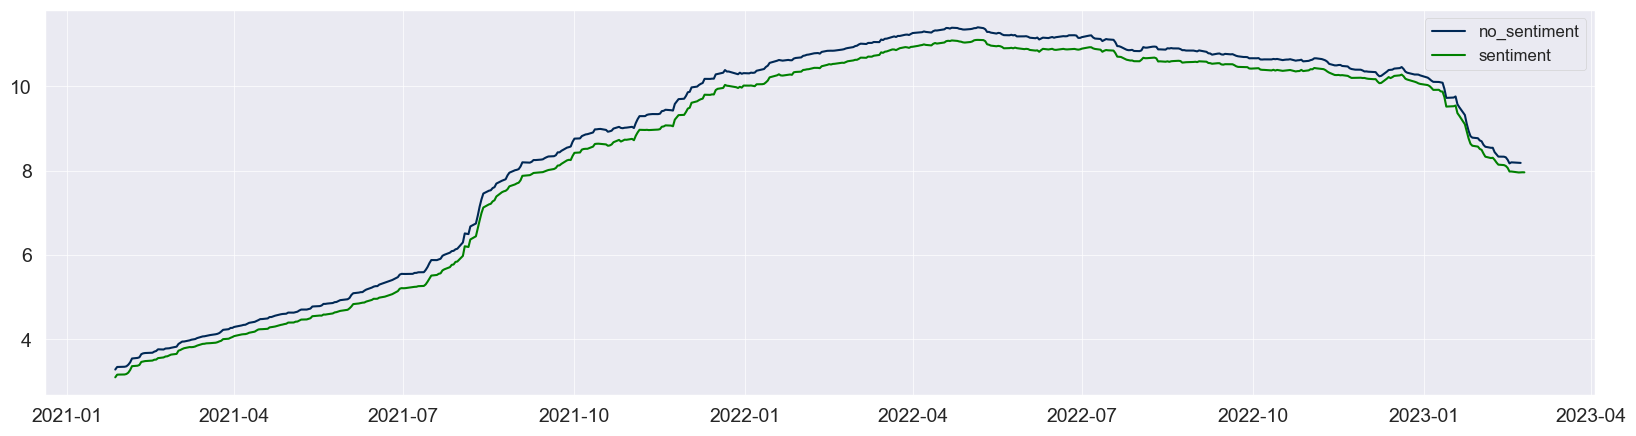

In [605]:
plt.figure(figsize=(20,5))
plt.plot(no_sentiment.index, no_sentiment.noSenti_resi)
plt.plot(resutls_df.index, resutls_df.Senti_resi, color = "green")
plt.legend(["no_sentiment", "sentiment"])
plt.show()